<a href="https://colab.research.google.com/github/seungchanLLee/DAP__/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Libraries
import pandas as pd
import numpy as np
import re
import os
import string
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS as stopwords_wc
from statsmodels.tsa.stattools import adfuller
class color:
    BOLD = '\033[1m' + '\033[93m'
    END = '\033[0m'

In [43]:
#read in data

#트윗들
tweets = pd.read_csv("https://raw.githubusercontent.com/seungchanLLee/DAP__/main/TweetsElonMusk.csv")
tweets = tweets[["id", "date", "time", "username", 
                 "tweet", "mentions", "urls", "photos", "replies_count", 
                 "retweets_count", "likes_count", "hashtags", "link"]]

tweets["year"] = tweets["date"].apply(lambda x: x.split("-")[0])

#도지코인
dogecoin = pd.read_csv("https://raw.githubusercontent.com/seungchanLLee/DAP__/main/DOGE-USD.csv")

##가장 최근 도지코인
doge_df = pd.read_csv("https://raw.githubusercontent.com/seungchanLLee/DAP__/main/DOGE-USD_the%20latest.csv")


#주제: 💰**Dogecoin on RAPIDS and Elon Musk's Tweets**

<img src="https://raw.githubusercontent.com/seungchanLLee/DAP__/main/title.jpg" height="300" width="600" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto"></img>



##목차

1. 일론 머스크와 트위터


2. 도지코인과 일론 머스크의 트윗의 상관관계


3. 왜 일론 머스크는 암호화폐를 좋아할까?


#1. 일론 머스크와 트위터

*일론머스크가 본격적으로 트윗을 한 시기는 2015년이다.2015년 테슬라의 가정용 충전 배터리 파워월을 발표하고 그의 사생활을 공개함으로써 슈퍼스타가 된 해이다*.

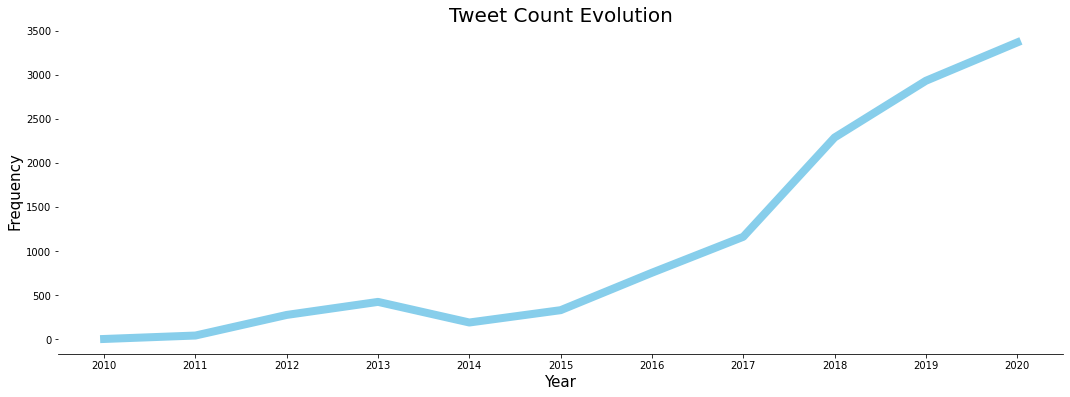

In [21]:
date_count_df = tweets[tweets["year"]!="2021"].groupby("year")["tweet"].count().reset_index()

plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=date_count_df, x="year", y="tweet", lw=8, color="skyblue")
plt.title("Tweet Count Evolution", size=20)
plt.xlabel("Year", size=15)
plt.ylabel("Frequency", size=15)
sns.despine(left=True);



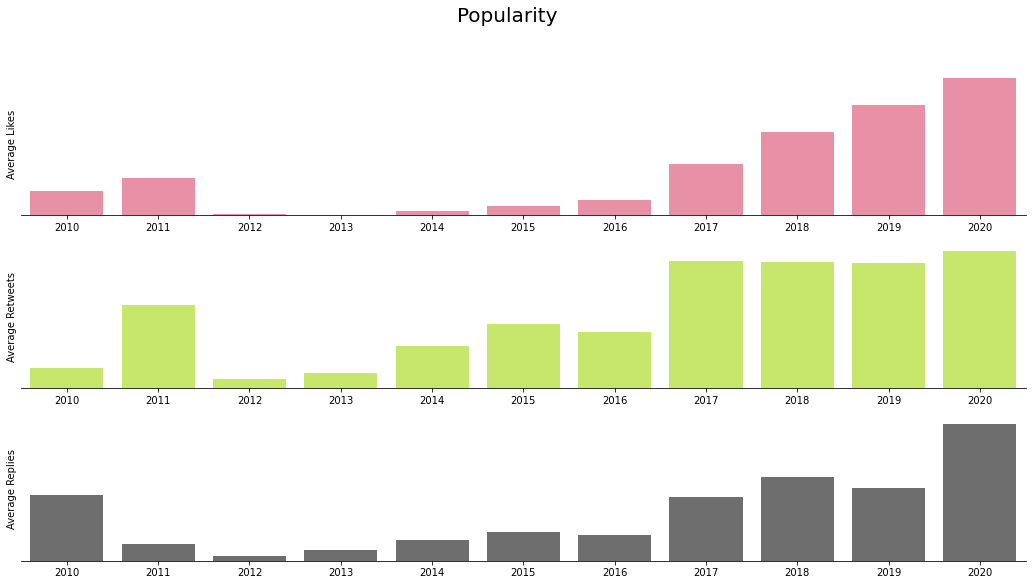

In [37]:
# Get Popularity Information
popularity = ["likes_count", "retweets_count", "replies_count"]
popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
                                                                    popularity[1] : 'sum',
                                                                    popularity[2] : 'sum',
                                                                    'tweet' : 'count'}).reset_index()
popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]


fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(18, 9))
axs = [ax1, ax2, ax3]
plt.suptitle("Popularity", size=20)
sns.barplot(data=popularity_df, x="year", y="likes_count", lw=5, color="#F7819F", ax=ax1)
sns.barplot(data=popularity_df, x="year", y="retweets_count", lw=5, color="#D0FA58", ax=ax2)
sns.barplot(data=popularity_df, x="year", y="replies_count", lw=5, color="#6E6E6E", ax=ax3)
names = ["Average Likes", "Average Retweets", "Average Replies"]
for ax, n in zip(axs, names):
    ax.set_xlabel("", size=10)
    ax.set_ylabel(n, size=10)
    ax.get_yaxis().set_ticks([])
#     ax.title.set_text(n)
sns.despine(left=True);

#2. 도지코인과 일론 머스크의 트윗의 상관관계

*도지코인은 2013년 당시 온라인에서 인기인 시바견 밈을 딴 암호화폐이다. 이 코인을 만든 유일한 목적은 그냥 심심해서라고 알려져 있고 무한정 만들 수 있다는 것이 비트코인과 큰 차이점을 보인다. 3원에 불과한 도지코인은 일론 머스크가 언급할 때마다 가격이 치솟고 거래량이 급증해 최고가 991원을 기록했다.(한국 거래소 기준 - 현재는 222원)*

아래는 2014년도 9월 17일부터 2021년 12월 11일까지 가장 최근 도지코인 시세 데이터이다.

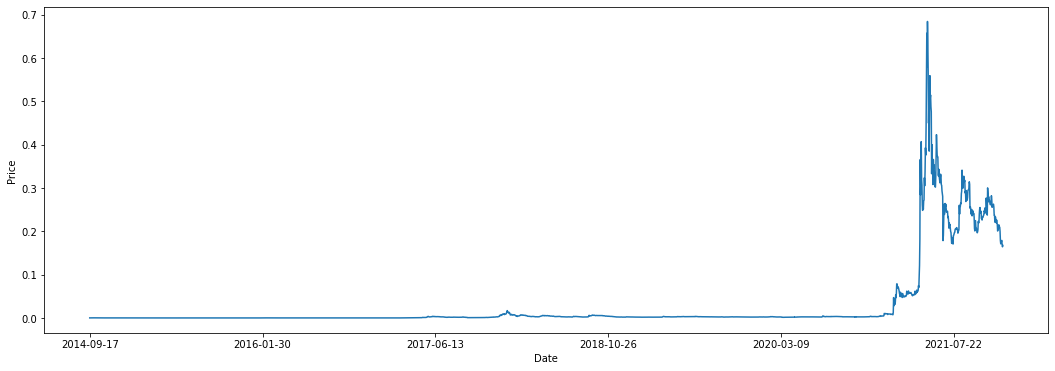

In [46]:
plt.figure(figsize = (18,6))
doge_df.groupby('Date')['Close'].mean().plot();
#plt.plot(doge_df_last1.Date,doge_df_last1.Close);
plt.xlabel('Date');
plt.ylabel('Price');

##머스크의 도지코인 관련 트윗 정리

In [63]:
# Get bitcoin info




 Most liked DOGECOIN tweets:
1. @dogecoin I just set up some little Doge mining rigs with my kids. It was fun.
2. @dogecoin Uh oh
3. @PPathole @dogecoin Just some used Antminer L3+ rigs bought off eBay. Not really economic, but it was a fun family project.
4. @dogecoinww @MattWallace888 @CorinnaKopf You raise a good point haha
